# King, William Joshua
# Homework 2


## Setup

In [ ]:
# Import key libraries  
import numpy as np
import matplotlib.pyplot as plt

Setting the random seed for code reproducibility.

In [ ]:
# to make this notebook's output stable across runs, we are going to see the random seed
myFavoriteNumber = 42
np.random.seed(myFavoriteNumber)

Note that we have to reset the random seed _every_ time we run an algorithm if we want the same results!

## Problem 3

This is a popular dataset on diabetes. Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [ ]:
from sklearn import datasets, model_selection, linear_model, metrics
diabetes=datasets.load_diabetes(return_X_y=False)
X3_train,X3_valid,y3_train,y3_valid=\
    model_selection.train_test_split(diabetes['data'],diabetes['target'],random_state=2)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [ ]:
# Compute MSE and coefficients for a range of alpha

n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)

coefs = []
mse_ridge_valid = []
mse_ridge_train = []
for a in alphas:
    ridge=linear_model.Ridge(alpha=a)
    ridge.fit(X3_train[:,:], y3_train[:])
    coefs.append(ridge.coef_)
    mse_ridge_valid.append(\
            mean_squared_error(y_true=y3_valid,y_pred=ridge.predict(X3_valid)))
    mse_ridge_train.append(\
            mean_squared_error(y_true=y3_train,y_pred=ridge.predict(X3_train)))

In [ ]:
fig2 = plt.figure(num=2, clear=True)
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(alphas, mse_ridge_valid, label = 'MSE for Validation Set')
ax2.plot(alphas,mse_ridge_train, label = 'MSE for Training Set')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('MSE')
ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.legend()
ax2.set_title("MSE for Diabetes Dataset using Ridge Regression")
for i in range(0, alphas.size):
  print(f"Alpha: {alphas[i]}. Validation MSE: {mse_ridge_valid[i]}. Training MSE:{mse_ridge_train[i]}")

We want an alpha value that minimizes the mean squared error for the validation dataset while keeping the training dataset's mean squared error less than the validation dataset's mean squared error in order to prevent overfitting. Thus, we take alpha as 0.087, which gives us the minimum validation MSE of 2903.32 and a training MSE of 2897.23.

In [ ]:
coefs_lasso = []
mse_lasso_train = []
mse_lasso_valid = []

for a in alphas:
  lasso3 = linear_model.Lasso(alpha=a)
  lasso3.fit(X3_train[:,:], y3_train[:])
  coefs_lasso.append(lasso3.coef_)
  mse_lasso_train.append(\
          mean_squared_error(y_true=y3_train,y_pred=lasso3.predict(X3_train)))
  mse_lasso_valid.append(\
          mean_squared_error(y_true=y3_valid,y_pred=lasso3.predict(X3_valid)))


Alpha: 0.0001. Validation MSE: 2932.925273836559. Training MSE:2852.722863631247
Alpha: 0.0001059560179277616. Validation MSE: 2932.913283096086. Training MSE:2852.7231006433376
Alpha: 0.00011226677735108136. Validation MSE: 2932.900590922684. Training MSE:2852.7233667137543
Alpha: 0.00011895340673703195. Validation MSE: 2932.8871568747813. Training MSE:2852.7236654095645
Alpha: 0.00012603829296797275. Validation MSE: 2932.8729384704466. Training MSE:2852.724000731366
Alpha: 0.00013354515629298989. Validation MSE: 2932.857890995278. Training MSE:2852.724377167917
Alpha: 0.00014149912974345758. Validation MSE: 2932.8419672349046. Training MSE:2852.7247997599766
Alpha: 0.00014992684327860457. Validation MSE: 2932.8250795627223. Training MSE:2852.725275312812
Alpha: 0.00015885651294280528. Validation MSE: 2932.8072492110714. Training MSE:2852.7258080220263
Alpha: 0.00016831803533309567. Validation MSE: 2932.7883850588123. Training MSE:2852.7264060449206
Alpha: 0.00017834308769319092. Vali

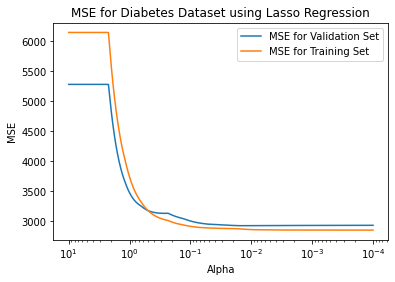

In [ ]:
fig4 = plt.figure(num=4, clear=True)
ax4 = fig4.add_subplot(1,1,1)
ax4.plot(alphas, mse_lasso_valid, label = 'MSE for Validation Set')
ax4.plot(alphas,mse_lasso_train, label = 'MSE for Training Set')
ax4.set_xlabel('Alpha')
ax4.set_ylabel('MSE')
ax4.set_xscale('log')
ax4.set_xlim(ax4.get_xlim()[::-1])
ax4.legend()
ax4.set_title("MSE for Diabetes Dataset using Lasso Regression")
for i in range(0, alphas.size):
  print(f"Alpha: {alphas[i]}. Validation MSE: {mse_lasso_valid[i]}. Training MSE:{mse_lasso_train[i]}")

We want an alpha value that minimizes the mean squared error for the validation dataset while keeping the training dataset's mean squared error less than the validation dataset's mean squared error in order to prevent overfitting. Thus, we take alpha as 0.1084, which gives us the minimum validation MSE of 2925.17 and a training MSE of 2863.01.

Text(0.5, 1.0, 'Coefficients for Ridge Regression Model of Diabetes DataSet')

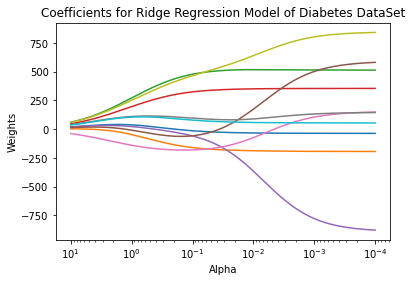

In [ ]:
fig1 = plt.figure(num=1, clear=True)
ax1 = fig1.add_subplot(1,1,1)
ax1.set_xscale('log')
ax1.plot(alphas, coefs)
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Weights')
ax1.set_title("Coefficients for Ridge Regression Model of Diabetes DataSet")

Text(0.5, 1.0, 'Coefficients for Lasso Regression Model of Diabetes DataSet')

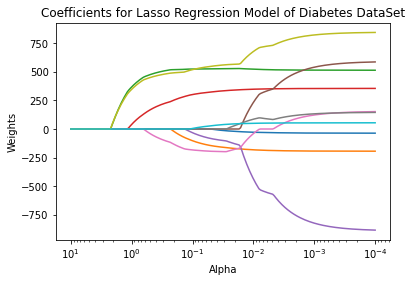

In [ ]:
fig3 = plt.figure(num=3, clear=True)
ax3 = fig3.add_subplot(1,1,1)
ax3.set_xscale('log')
ax3.plot(alphas, coefs_lasso)
ax3.set_xlim(ax3.get_xlim()[::-1])
ax3.set_xlabel('Alpha')
ax3.set_ylabel('Weights')
ax3.set_title("Coefficients for Lasso Regression Model of Diabetes DataSet")

I prefer Lasso Regression here because the chosen parameters give a validation MSE is only slightly higher than the validation MSE of the Ridge Regression with the chosen parameters, and the lasso regression nullifies some of the featurues by setting their coefficients to zero. Less coefficients mean a simpler model that removes "duplicate" features and prevent overfitting.

In [ ]:
coefs3_elasticnet = []
mse_elastic_train = []
mse_elastic_valid = []

n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)
l1_ratios = np.linspace(0.01, 0.99, 99)

for l1 in l1_ratios:  
  mse_elastic_train_dump = []
  mse_elastic_valid_dump = []
  for a in alphas:
    elastic = linear_model.ElasticNet(alpha=a, l1_ratio=l1)
    elastic.fit(X3_train[:,:], y3_train[:])
    mse_elastic_train_dump.append(\
        mean_squared_error(y_true=y3_train, y_pred=elastic.predict(X3_train)))
    mse_elastic_valid_dump.append(\
        mean_squared_error(y_true=y3_valid, y_pred=elastic.predict(X3_valid)))
    print(f"Alpha = {a}, L1 Ratio = {l1} Training MSE = {mean_squared_error(y_true=y3_train, y_pred=elastic.predict(X3_train))} Validation MSE = {mean_squared_error(y_true=y3_valid, y_pred=elastic.predict(X3_valid))}")
  mse_elastic_train.append(mse_elastic_train_dump)
  mse_elastic_valid.append(mse_elastic_valid_dump)

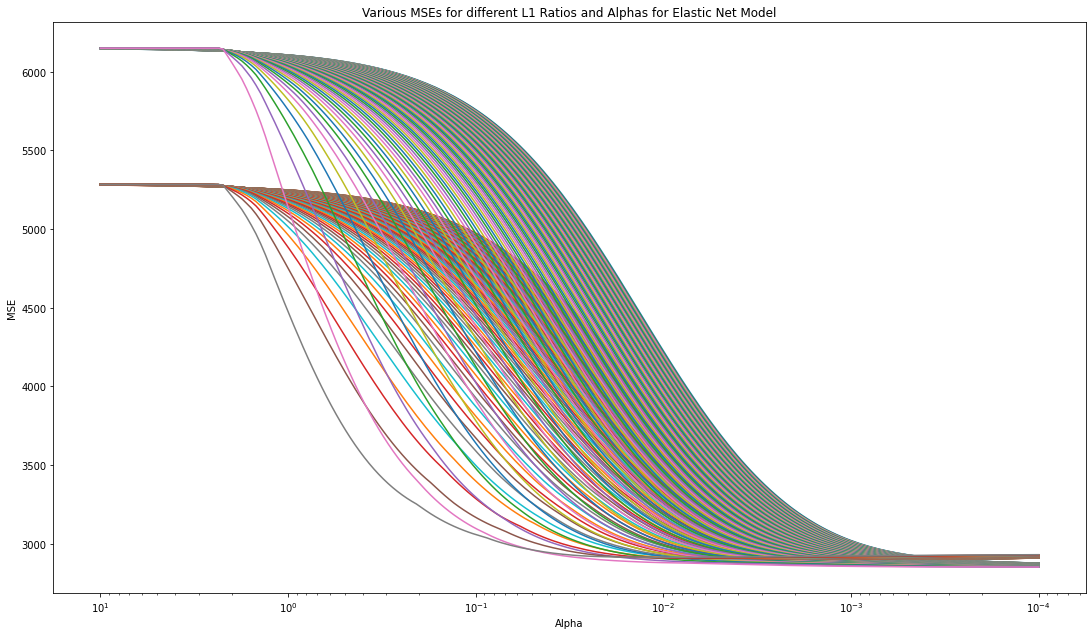

In [ ]:
fig5 = plt.figure(num=5, clear=True)
ax5 = fig5.add_subplot(1,1,1)
for i in range(0, 99):
  ax5.plot(alphas, mse_elastic_train[i], label = f"MSE for Elastic Training Set -- L1 Ratio = {(i+1)/100}")
  ax5.plot(alphas, mse_elastic_valid[i], label = f"MSE for Elastic Validation Set -- L1 Ratio = {(i+1)/100}")

ax5.set_xlabel('Alpha')
ax5.set_ylabel('MSE')
ax5.set_title('Various MSEs for different L1 Ratios and Alphas for Elastic Net Model')
#ax5.legend()
ax5.set_xscale('log')
ax5.set_xlim(ax5.get_xlim()[::-1])
fig5.set_size_inches(18.5, 10.5)

2903.324156767722
2852.8128231999144


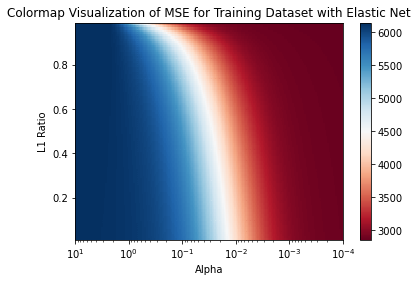

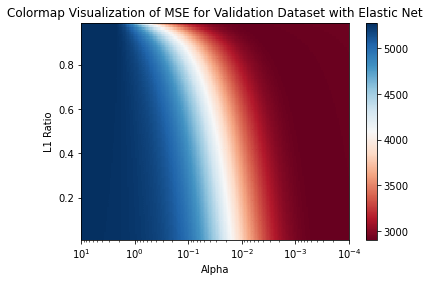

In [ ]:
fig6 = plt.figure(num=6, clear=True)
ax6 = fig6.add_subplot(1,1,1)
c3train = ax6.pcolormesh(alphas, l1_ratios, mse_elastic_train, cmap='RdBu', vmin=np.min(mse_elastic_train), vmax=np.max(mse_elastic_train))
fig6.colorbar(c3train, ax=ax6)
ax6.set_xscale('log')
ax6.set_xlim(ax6.get_xlim()[::-1])
ax6.set_title('Colormap Visualization of MSE for Training Dataset with Elastic Net')
ax6.set_xlabel('Alpha')
ax6.set_ylabel('L1 Ratio')

fig7 = plt.figure(num=7, clear=True)
ax7 = fig7.add_subplot(1,1,1)
c3valid = ax7.pcolormesh(alphas, l1_ratios, mse_elastic_valid, cmap='RdBu', vmin=np.min(mse_elastic_valid), vmax=np.max(mse_elastic_valid))
fig7.colorbar(c3valid, ax=ax7)
ax7.set_xscale('log')
ax7.set_xlim(ax7.get_xlim()[::-1])
ax7.set_title('Colormap Visualization of MSE for Validation Dataset with Elastic Net')
ax7.set_xlabel('Alpha')
ax7.set_ylabel('L1 Ratio')

print(np.min(mse_elastic_valid))
print(np.min(mse_elastic_train))

For Elastic Regression:

I take L1 ratio to be 0.77 and alpha to be 0.001136 since it results in the minimum validation MSE while retaining training MSE to be lower than validation MSE in order to prevent overfitting.


## Problem 4
Here we load a synthetic dataset and perform penalized regression on it.

You must first download the data from Sakai (Resources -> Homework -> Homework 2).

We discussed several methods for loading data into a Colab notebook. I recommend putting the data on your Google Drive, then mounting your Google Drive to the Colab notebook.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_4_x = "/content/drive/MyDrive/Colab Notebooks/ME 555 HW 2 Data/hw2_problem_4_X.csv"
path_to_4_y = "/content/drive/MyDrive/Colab Notebooks/ME 555 HW 2 Data/hw2_problem_4_y.csv"
path_to_4_x_blind = "/content/drive/MyDrive/Colab Notebooks/ME 555 HW 2 Data/hw2_problem_4_X_blind.csv"

Xdf4=pd.read_csv(path_to_4_x)
ydf4=pd.read_csv(path_to_4_y)
Xdf4_blind=pd.read_csv(path_to_4_x_blind)
X4=np.array(Xdf4.values[:,1:],dtype=np.float64)
y4=np.array(ydf4.values[:,1],dtype=np.float64)
X4_blind=np.array(Xdf4_blind.values[:,1:],dtype=np.float64)

In [ ]:
from sklearn import preprocessing

In [ ]:
std_scaler = preprocessing.StandardScaler()
minmax_scaler = preprocessing.MinMaxScaler()
maxabs_scaler = preprocessing.MaxAbsScaler()

In [ ]:
#Scaling and Splitting Data
X4_train,X4_valid,y4_train,y4_valid=\
    model_selection.train_test_split(X4, y4, random_state = 2)

std_scaler.fit(X4_train)
minmax_scaler.fit(X4_train)
maxabs_scaler.fit(X4_train)
X4_train_std_scaled = std_scaler.transform(X4_train)
X4_valid_std_scaled = std_scaler.transform(X4_valid)
X4_train_minmax_scaled = minmax_scaler.transform(X4_train)
X4_valid_minmax_scaled = minmax_scaler.transform(X4_valid)
X4_train_maxabs_scaled = maxabs_scaler.transform(X4_train)
X4_valid_maxabs_scaled = maxabs_scaler.transform(X4_valid)

In [ ]:
#Lasso Regression
n_alphas_4 = 200
alphas_4 = np.logspace(-4, 1, n_alphas_4)

coefs_4_lasso_std = []
coefs_4_lasso_minmax = []
coefs_4_lasso_maxabs = []
mse_lasso_valid_4_std = []
mse_lasso_valid_4_minmax = []
mse_lasso_valid_4_maxabs = []
mse_lasso_train_4_std = []
mse_lasso_train_4_minmax = []
mse_lasso_train_4_maxabs = []
for a in alphas_4:
    lasso_4_std=linear_model.Lasso(alpha=a, tol= 0.001)
    lasso_4_std.fit(X4_train_std_scaled[:,:], y4_train[:])
    coefs_4_lasso_std.append(lasso_4_std.coef_)
    mse_lasso_valid_4_std.append(\
            mean_squared_error(y_true=y4_valid,y_pred=lasso_4_std.predict(X4_valid_std_scaled)))
    mse_lasso_train_4_std.append(\
            mean_squared_error(y_true=y4_train,y_pred=lasso_4_std.predict(X4_train_std_scaled)))
for a in alphas_4:
    #MinMax + Lasso
    lasso_4_minmax=linear_model.Lasso(alpha=a, tol = 0.001)
    lasso_4_minmax.fit(X4_train_minmax_scaled[:,:], y4_train[:])
    coefs_4_lasso_minmax.append(lasso_4_minmax.coef_)
    mse_lasso_valid_4_minmax.append(\
            mean_squared_error(y_true=y4_valid,y_pred=lasso_4_minmax.predict(X4_valid_minmax_scaled)))
    mse_lasso_train_4_minmax.append(\
            mean_squared_error(y_true=y4_train,y_pred=lasso_4_minmax.predict(X4_train_minmax_scaled)))
for a in alphas_4:
    #MaxAbs + Lasso
    lasso_4_maxabs=linear_model.Lasso(alpha=a, tol = 0.001)
    lasso_4_maxabs.fit(X4_train_maxabs_scaled[:,:], y4_train[:])
    coefs_4_lasso_maxabs.append(lasso_4_maxabs.coef_)
    mse_lasso_valid_4_maxabs.append(\
            mean_squared_error(y_true=y4_valid,y_pred=lasso_4_maxabs.predict(X4_valid_maxabs_scaled)))
    mse_lasso_train_4_maxabs.append(\
            mean_squared_error(y_true=y4_train,y_pred=lasso_4_maxabs.predict(X4_train_maxabs_scaled)))

In [ ]:
for i in range(0, alphas_4.size):
  print(f"Alpha: {alphas_4[i]}. Validation MSE: {mse_lasso_valid_4_std[i]}. Training MSE:{mse_lasso_train_4_std[i]}. Std + Lasso")

for i in range(0, alphas_4.size):
  print(f"Alpha: {alphas_4[i]}. Validation MSE: {mse_lasso_valid_4_minmax[i]}. Training MSE:{mse_lasso_train_4_minmax[i]}. Minmax + Lasso")

for i in range(0, alphas_4.size):
  print(f"Alpha: {alphas_4[i]}. Validation MSE: {mse_lasso_valid_4_maxabs[i]}. Training MSE:{mse_lasso_train_4_maxabs[i]}. Maxabs + Lasso")

Text(0.5, 0, 'Alpha')

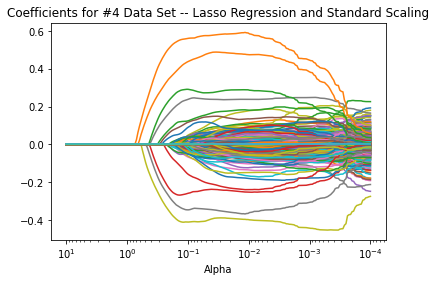

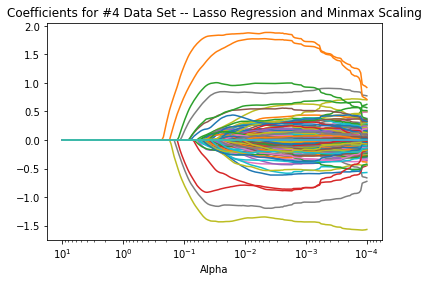

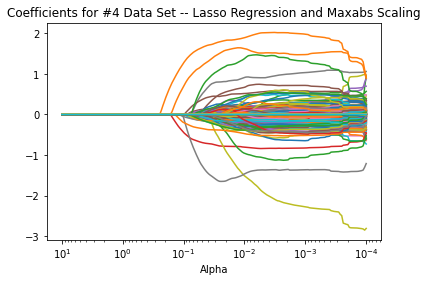

In [ ]:
#Plotting Lasso Coefficients of Different Scaling Methods
fig8 = plt.figure(num=8, clear=True)
ax8 = fig8.add_subplot(1,1,1)
ax8.set_xscale('log')
ax8.plot(alphas_4, coefs_4_lasso_std)
ax8.set_xlim(ax8.get_xlim()[::-1])
ax8.set_title("Coefficients for #4 Data Set -- Lasso Regression and Standard Scaling")
ax8.set_xlabel('Alpha')

fig9 = plt.figure(num=9, clear=True)
ax9 = fig9.add_subplot(1,1,1)
ax9.set_xscale('log')
ax9.plot(alphas_4, coefs_4_lasso_minmax)
ax9.set_xlim(ax9.get_xlim()[::-1])
ax9.set_title("Coefficients for #4 Data Set -- Lasso Regression and Minmax Scaling")
ax9.set_xlabel('Alpha')

fig10 = plt.figure(num=10, clear=True)
ax10 = fig10.add_subplot(1,1,1)
ax10.set_xscale('log')
ax10.plot(alphas_4, coefs_4_lasso_maxabs)
ax10.set_xlim(ax10.get_xlim()[::-1])
ax10.set_title("Coefficients for #4 Data Set -- Lasso Regression and Maxabs Scaling")
ax10.set_xlabel('Alpha')

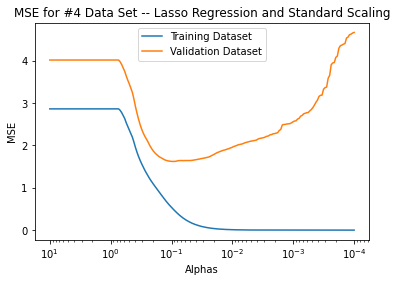

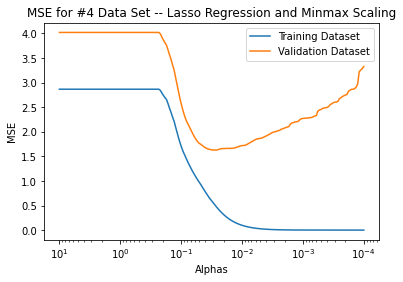

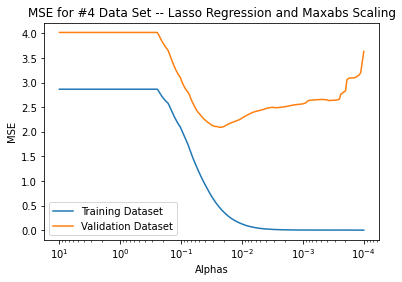

In [ ]:
#Plotting Lasso MSEs for Different Scaling Methods
fig11 = plt.figure(num=11, clear=True)
ax11 = fig11.add_subplot(1,1,1)
ax11.set_xscale('log')
ax11.plot(alphas_4, mse_lasso_train_4_std, label = "Training Dataset")
ax11.plot(alphas_4, mse_lasso_valid_4_std, label = "Validation Dataset")
ax11.set_xlim(ax11.get_xlim()[::-1])
ax11.set_title("MSE for #4 Data Set -- Lasso Regression and Standard Scaling")
ax11.set_ylabel('MSE')
ax11.set_xlabel("Alphas")
ax11.legend()

fig12 = plt.figure(num=12, clear=True)
ax12 = fig12.add_subplot(1,1,1)
ax12.set_xscale('log')
ax12.plot(alphas_4, mse_lasso_train_4_minmax, label = "Training Dataset")
ax12.plot(alphas_4, mse_lasso_valid_4_minmax, label = "Validation Dataset")
ax12.set_xlim(ax12.get_xlim()[::-1])
ax12.set_title("MSE for #4 Data Set -- Lasso Regression and Minmax Scaling")
ax12.set_ylabel('MSE')
ax12.set_xlabel("Alphas")
ax12.legend()

fig13 = plt.figure(num=13, clear=True)
ax13 = fig13.add_subplot(1,1,1)
ax13.set_xscale('log')
ax13.plot(alphas_4, mse_lasso_train_4_maxabs, label = "Training Dataset")
ax13.plot(alphas_4, mse_lasso_valid_4_maxabs, label = "Validation Dataset")
ax13.set_xlim(ax13.get_xlim()[::-1])
ax13.set_title("MSE for #4 Data Set -- Lasso Regression and Maxabs Scaling")
ax13.set_ylabel('MSE')
ax13.set_xlabel("Alphas")
ax13.legend()

Alpha: 0.09771241535346502. Validation MSE: 1.6221617181346797. Training MSE:0.5214083648848111. Std + Lasso

Alpha: 0.02899422853882878. Validation MSE: 1.626574310327876. Training MSE:0.535868063327673. Minmax + Lasso

Alpha: 0.021711179456945052. Validation MSE: 2.090338872520384. Training MSE:0.4135304738513637. Maxabs + Lasso

In [ ]:
#Ridge Regression
n_alphas_4 = 200
alphas_4 = np.logspace(-4, 1, n_alphas_4)

coefs_4_ridge_std = []
coefs_4_ridge_minmax = []
coefs_4_ridge_maxabs = []
mse_ridge_valid_4_std = []
mse_ridge_valid_4_minmax = []
mse_ridge_valid_4_maxabs = []
mse_ridge_train_4_std = []
mse_ridge_train_4_minmax = []
mse_ridge_train_4_maxabs = []
for a in alphas_4:
    ridge_4_std=linear_model.Ridge(alpha=a, tol = 0.001)
    ridge_4_std.fit(X4_train_std_scaled[:,:], y4_train[:])
    coefs_4_ridge_std.append(ridge_4_std.coef_)
    mse_ridge_valid_4_std.append(\
            mean_squared_error(y_true=y4_valid,y_pred=ridge_4_std.predict(X4_valid_std_scaled)))
    mse_ridge_train_4_std.append(\
            mean_squared_error(y_true=y4_train,y_pred=ridge_4_std.predict(X4_train_std_scaled)))
for a in alphas_4:
    #MinMax + Lasso
    ridge_4_minmax=linear_model.Ridge(alpha=a, tol = 0.001)
    ridge_4_minmax.fit(X4_train_minmax_scaled[:,:], y4_train[:])
    coefs_4_ridge_minmax.append(ridge_4_minmax.coef_)
    mse_ridge_valid_4_minmax.append(\
            mean_squared_error(y_true=y4_valid,y_pred=ridge_4_minmax.predict(X4_valid_minmax_scaled)))
    mse_ridge_train_4_minmax.append(\
            mean_squared_error(y_true=y4_train,y_pred=ridge_4_minmax.predict(X4_train_minmax_scaled)))
for a in alphas_4:
    #MaxAbs + Lasso
    ridge_4_maxabs=linear_model.Ridge(alpha=a, tol = 0.001)
    ridge_4_maxabs.fit(X4_train_maxabs_scaled[:,:], y4_train[:])
    coefs_4_ridge_maxabs.append(ridge_4_maxabs.coef_)
    mse_ridge_valid_4_maxabs.append(\
            mean_squared_error(y_true=y4_valid,y_pred=ridge_4_maxabs.predict(X4_valid_maxabs_scaled)))
    mse_ridge_train_4_maxabs.append(\
            mean_squared_error(y_true=y4_train,y_pred=ridge_4_maxabs.predict(X4_train_maxabs_scaled)))

In [ ]:
for i in range(0, alphas_4.size):
  print(f"Alpha: {alphas_4[i]}. Validation MSE: {mse_ridge_valid_4_std[i]}. Training MSE:{mse_ridge_train_4_std[i]}. Std + Ridge")

for i in range(0, alphas_4.size):
  print(f"Alpha: {alphas_4[i]}. Validation MSE: {mse_ridge_valid_4_minmax[i]}. Training MSE:{mse_ridge_train_4_minmax[i]}. Minmax + Ridge")

for i in range(0, alphas_4.size):
  print(f"Alpha: {alphas_4[i]}. Validation MSE: {mse_ridge_valid_4_maxabs[i]}. Training MSE:{mse_ridge_train_4_maxabs[i]}. Maxabs + Ridge")

Text(0.5, 0, 'Alpha')

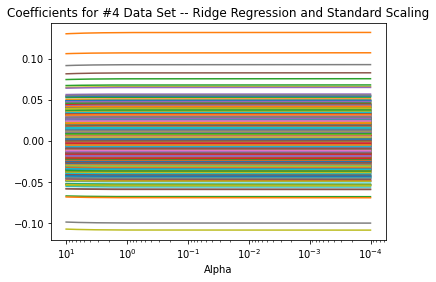

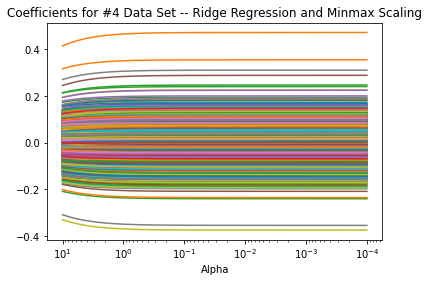

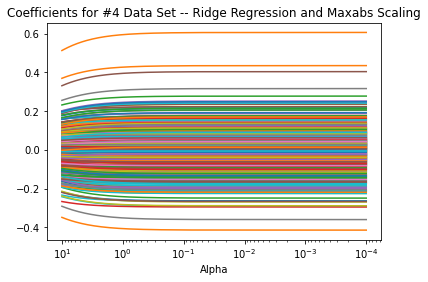

In [ ]:
#Plotting Ridge Coefficients of Different Scaling Methods
fig14 = plt.figure(num=14, clear=True)
ax14 = fig14.add_subplot(1,1,1)
ax14.set_xscale('log')
ax14.plot(alphas_4, coefs_4_ridge_std)
ax14.set_xlim(ax14.get_xlim()[::-1])
ax14.set_title("Coefficients for #4 Data Set -- Ridge Regression and Standard Scaling")
ax14.set_xlabel('Alpha')

fig15 = plt.figure(num=15, clear=True)
ax15 = fig15.add_subplot(1,1,1)
ax15.set_xscale('log')
ax15.plot(alphas_4, coefs_4_ridge_minmax)
ax15.set_xlim(ax15.get_xlim()[::-1])
ax15.set_title("Coefficients for #4 Data Set -- Ridge Regression and Minmax Scaling")
ax15.set_xlabel('Alpha')

fig16 = plt.figure(num=16, clear=True)
ax16 = fig16.add_subplot(1,1,1)
ax16.set_xscale('log')
ax16.plot(alphas_4, coefs_4_ridge_maxabs)
ax16.set_xlim(ax16.get_xlim()[::-1])
ax16.set_title("Coefficients for #4 Data Set -- Ridge Regression and Maxabs Scaling")
ax16.set_xlabel('Alpha')

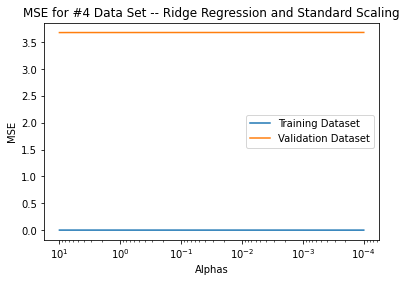

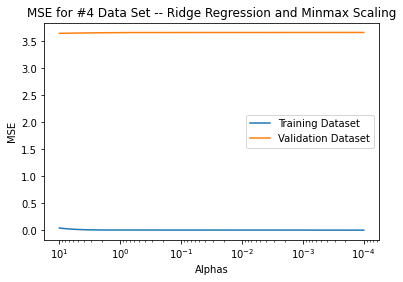

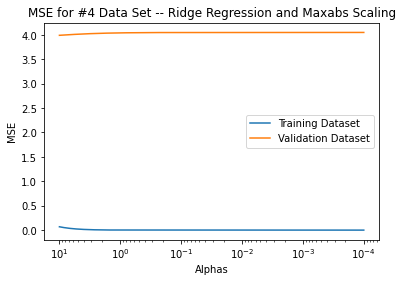

In [ ]:
#Plotting Ridge MSEs for Different Scaling Methods
fig17 = plt.figure(num=17, clear=True)
ax17 = fig17.add_subplot(1,1,1)
ax17.set_xscale('log')
ax17.plot(alphas_4, mse_ridge_train_4_std, label = "Training Dataset")
ax17.plot(alphas_4, mse_ridge_valid_4_std, label = "Validation Dataset")
ax17.set_xlim(ax17.get_xlim()[::-1])
ax17.set_title("MSE for #4 Data Set -- Ridge Regression and Standard Scaling")
ax17.set_ylabel('MSE')
ax17.set_xlabel("Alphas")
ax17.legend()

fig18 = plt.figure(num=18, clear=True)
ax18 = fig18.add_subplot(1,1,1)
ax18.set_xscale('log')
ax18.plot(alphas_4, mse_ridge_train_4_minmax, label = "Training Dataset")
ax18.plot(alphas_4, mse_ridge_valid_4_minmax, label = "Validation Dataset")
ax18.set_xlim(ax18.get_xlim()[::-1])
ax18.set_title("MSE for #4 Data Set -- Ridge Regression and Minmax Scaling")
ax18.set_ylabel('MSE')
ax18.set_xlabel("Alphas")
ax18.legend()

fig19 = plt.figure(num=19, clear=True)
ax19 = fig19.add_subplot(1,1,1)
ax19.set_xscale('log')
ax19.plot(alphas_4, mse_ridge_train_4_maxabs, label = "Training Dataset")
ax19.plot(alphas_4, mse_ridge_valid_4_maxabs, label = "Validation Dataset")
ax19.set_xlim(ax19.get_xlim()[::-1])
ax19.set_title("MSE for #4 Data Set -- Ridge Regression and Maxabs Scaling")
ax19.set_ylabel('MSE')
ax19.set_xlabel("Alphas")
ax19.legend()

Note: Ridge Regression seems to be wacky here. Training dataset MSE is close to zero always, while validation dataset has an MSE that is pretty much a straight line.

In [ ]:
coefs_4_elasticnet_std = []
mse_elastic_train_4_std = []
mse_elastic_valid_4_std = []

l1_ratios = np.linspace(0.01, 0.99, 99)

for l1 in l1_ratios:  
  mse_elastic_train_dump = []
  mse_elastic_valid_dump = []
  for a in alphas_4:
    elastic_4_std = linear_model.ElasticNet(alpha=a, l1_ratio=l1, tol = 0.001)
    elastic_4_std.fit(X4_train_std_scaled[:,:], y4_train[:])
    mse_elastic_train_dump.append(\
        mean_squared_error(y_true=y4_train, y_pred=elastic_4_std.predict(X4_train_std_scaled)))
    mse_elastic_valid_dump.append(\
        mean_squared_error(y_true=y4_valid, y_pred=elastic_4_std.predict(X4_valid_std_scaled)))
    print(f"Alpha = {a}, L1 Ratio = {l1} Training MSE = {mean_squared_error(y_true=y4_train, y_pred=elastic_4_std.predict(X4_train_std_scaled))} Validation MSE = {mean_squared_error(y_true=y4_valid, y_pred=elastic_4_std.predict(X4_valid_std_scaled))}")
  mse_elastic_train_4_std.append(mse_elastic_train_dump)
  mse_elastic_valid_4_std.append(mse_elastic_valid_dump)

1.6247600552596007
4.412023200684322e-09


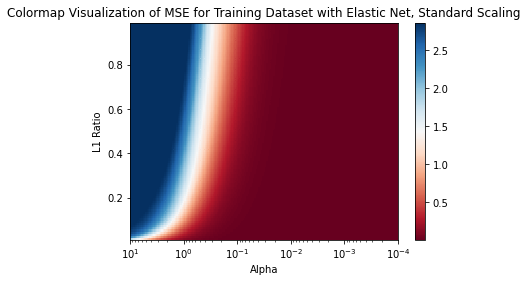

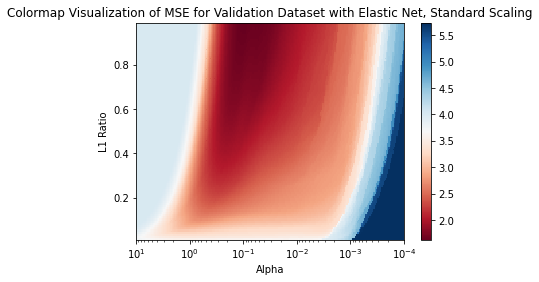

In [ ]:
fig20 = plt.figure(num=20, clear=True)
ax20 = fig20.add_subplot(1,1,1)
c4train_std = ax20.pcolormesh(alphas_4, l1_ratios, mse_elastic_train_4_std, cmap='RdBu', vmin=np.min(mse_elastic_train_4_std), vmax=np.max(mse_elastic_train_4_std))
fig20.colorbar(c4train_std, ax=ax20)
ax20.set_xscale('log')
ax20.set_xlim(ax20.get_xlim()[::-1])
ax20.set_title('Colormap Visualization of MSE for Training Dataset with Elastic Net, Standard Scaling')
ax20.set_xlabel('Alpha')
ax20.set_ylabel('L1 Ratio')

fig21 = plt.figure(num=21, clear=True)
ax21 = fig21.add_subplot(1,1,1)
c4valid_std = ax21.pcolormesh(alphas_4, l1_ratios, mse_elastic_valid_4_std, cmap='RdBu', vmin=np.min(mse_elastic_valid_4_std), vmax=np.max(mse_elastic_valid_4_std))
fig21.colorbar(c4valid_std, ax=ax21)
ax21.set_xscale('log')
ax21.set_xlim(ax21.get_xlim()[::-1])
ax21.set_title('Colormap Visualization of MSE for Validation Dataset with Elastic Net, Standard Scaling')
ax21.set_xlabel('Alpha')
ax21.set_ylabel('L1 Ratio')

print(np.min(mse_elastic_valid_4_std))
print(np.min(mse_elastic_train_4_std))

For the Elastic Net, and Standard Scaling, we take and L1 Ratio of 0.99 and Alpha of 0.087 since it led to the smallest MSE for the validation dataset (1.627), while having the constraint of having a smaller training MSE (0.4406) than validation MSE to prevent overfitting.

Note that minimum MSE in this case is not taken as the absolute minimum, but those that are around 0.01 of the absolute minimum. I took into consideration the training MSEs of the set of L1 Ratios and Alphas that gave validation MSEs within plus or minus 0.01 of the absolute minimum validation MSE and took the paramters that gave the smallest training MSE among the subset as well.


In [ ]:
coefs_4_elasticnet_minmax = []
mse_elastic_train_4_minmax = []
mse_elastic_valid_4_minmax = []

l1_ratios = np.linspace(0.01, 0.99, 99)

for l1 in l1_ratios:  
  mse_elastic_train_dump = []
  mse_elastic_valid_dump = []
  for a in alphas_4:
    elastic_4_minmax = linear_model.ElasticNet(alpha=a, l1_ratio=l1, tol = 0.001)
    elastic_4_minmax.fit(X4_train_minmax_scaled[:,:], y4_train[:])
    mse_elastic_train_dump.append(\
        mean_squared_error(y_true=y4_train, y_pred=elastic_4_minmax.predict(X4_train_minmax_scaled)))
    mse_elastic_valid_dump.append(\
        mean_squared_error(y_true=y4_valid, y_pred=elastic_4_minmax.predict(X4_valid_minmax_scaled)))
    print(f"Alpha = {a}, L1 Ratio = {l1} Training MSE = {mean_squared_error(y_true=y4_train, y_pred=elastic_4_minmax.predict(X4_train_minmax_scaled))} Validation MSE = {mean_squared_error(y_true=y4_valid, y_pred=elastic_4_minmax.predict(X4_valid_minmax_scaled))}")
  mse_elastic_train_4_minmax.append(mse_elastic_train_dump)
  mse_elastic_valid_4_minmax.append(mse_elastic_valid_dump)

1.6358329180091593
6.609616280507806e-08


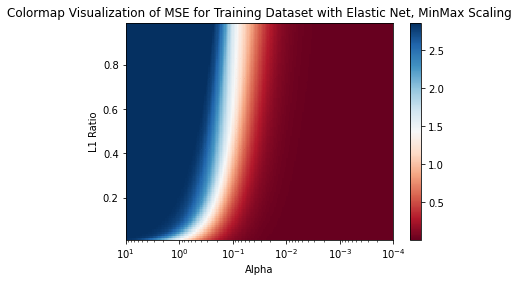

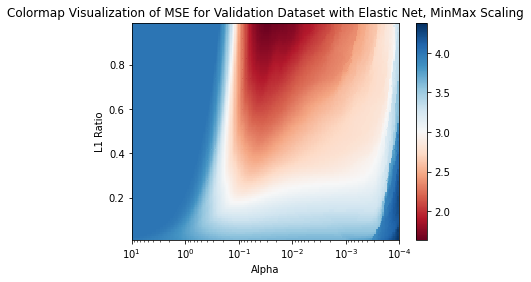

In [ ]:
fig22 = plt.figure(num=22, clear=True)
ax22 = fig22.add_subplot(1,1,1)
c4train_minmax = ax22.pcolormesh(alphas_4, l1_ratios, mse_elastic_train_4_minmax, cmap='RdBu', vmin=np.min(mse_elastic_train_4_minmax), vmax=np.max(mse_elastic_train_4_minmax))
fig22.colorbar(c4train_minmax, ax=ax22)
ax22.set_xscale('log')
ax22.set_xlim(ax22.get_xlim()[::-1])
ax22.set_title('Colormap Visualization of MSE for Training Dataset with Elastic Net, MinMax Scaling')
ax22.set_xlabel('Alpha')
ax22.set_ylabel('L1 Ratio')

fig23 = plt.figure(num=23, clear=True)
ax23 = fig23.add_subplot(1,1,1)
c4valid_minmax = ax23.pcolormesh(alphas_4, l1_ratios, mse_elastic_valid_4_minmax, cmap='RdBu', vmin=np.min(mse_elastic_valid_4_minmax), vmax=np.max(mse_elastic_valid_4_minmax))
fig23.colorbar(c4valid_minmax, ax=ax23)
ax23.set_xscale('log')
ax23.set_xlim(ax23.get_xlim()[::-1])
ax23.set_title('Colormap Visualization of MSE for Validation Dataset with Elastic Net, MinMax Scaling')
ax23.set_xlabel('Alpha')
ax23.set_ylabel('L1 Ratio')

print(np.min(mse_elastic_valid_4_minmax))
print(np.min(mse_elastic_train_4_minmax))

For the Elastic Net, and MinMax Scaling, we take and L1 Ratio of 0.99 and Alpha of 0.0307 since it led to the smallest MSE for the validation dataset (1.636), while having the constraint of having a smaller training MSE (0.569) than validation MSE to prevent overfitting.






In [ ]:
coefs_4_elasticnet_maxabs = []
mse_elastic_train_4_maxabs = []
mse_elastic_valid_4_maxabs = []

l1_ratios = np.linspace(0.01, 0.99, 99)

for l1 in l1_ratios:  
  mse_elastic_train_dump = []
  mse_elastic_valid_dump = []
  for a in alphas_4:
    elastic_4_maxabs = linear_model.ElasticNet(alpha=a, l1_ratio=l1, tol = 0.001)
    elastic_4_maxabs.fit(X4_train_maxabs_scaled[:,:], y4_train[:])
    mse_elastic_train_dump.append(\
        mean_squared_error(y_true=y4_train, y_pred=elastic_4_maxabs.predict(X4_train_maxabs_scaled)))
    mse_elastic_valid_dump.append(\
        mean_squared_error(y_true=y4_valid, y_pred=elastic_4_maxabs.predict(X4_valid_maxabs_scaled)))
    print(f"Alpha = {a}, L1 Ratio = {l1} Training MSE = {mean_squared_error(y_true=y4_train, y_pred=elastic_4_maxabs.predict(X4_train_maxabs_scaled))} Validation MSE = {mean_squared_error(y_true=y4_valid, y_pred=elastic_4_maxabs.predict(X4_valid_maxabs_scaled))}")
  mse_elastic_train_4_maxabs.append(mse_elastic_train_dump)
  mse_elastic_valid_4_maxabs.append(mse_elastic_valid_dump)

2.1048578860868874
3.4476611552391923e-07


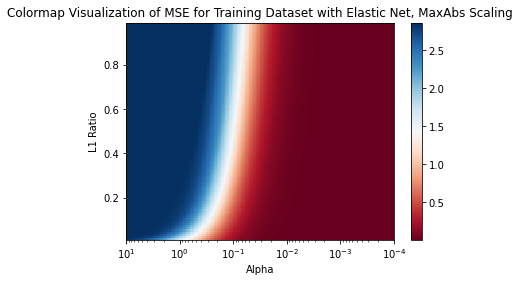

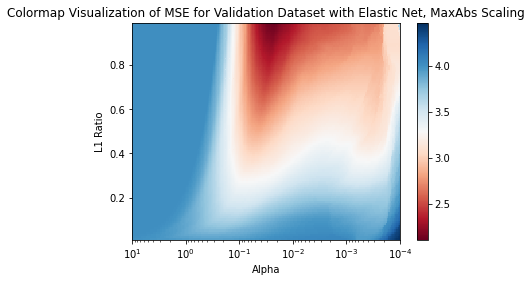

In [ ]:
fig24 = plt.figure(num=24, clear=True)
ax24 = fig24.add_subplot(1,1,1)
c4train_maxabs = ax24.pcolormesh(alphas_4, l1_ratios, mse_elastic_train_4_maxabs, cmap='RdBu', vmin=np.min(mse_elastic_train_4_maxabs), vmax=np.max(mse_elastic_train_4_maxabs))
fig24.colorbar(c4train_maxabs, ax=ax24)
ax24.set_xscale('log')
ax24.set_xlim(ax24.get_xlim()[::-1])
ax24.set_title('Colormap Visualization of MSE for Training Dataset with Elastic Net, MaxAbs Scaling')
ax24.set_xlabel('Alpha')
ax24.set_ylabel('L1 Ratio')

fig25 = plt.figure(num=25, clear=True)
ax25 = fig25.add_subplot(1,1,1)
c4valid_maxabs = ax25.pcolormesh(alphas_4, l1_ratios, mse_elastic_valid_4_maxabs, cmap='RdBu', vmin=np.min(mse_elastic_valid_4_maxabs), vmax=np.max(mse_elastic_valid_4_maxabs))
fig25.colorbar(c4valid_maxabs, ax=ax25)
ax25.set_xscale('log')
ax25.set_xlim(ax25.get_xlim()[::-1])
ax25.set_title('Colormap Visualization of MSE for Validation Dataset with Elastic Net, MaxAbs Scaling')
ax25.set_xlabel('Alpha')
ax25.set_ylabel('L1 Ratio')

print(np.min(mse_elastic_valid_4_maxabs))
print(np.min(mse_elastic_train_4_maxabs))

For the Elastic Net, and MaxAbs Scaling, we take and L1 Ratio of 0.99 and Alpha of 0.023 since it led to the smallest MSE for the validation dataset (2.105), while having the constraint of having a smaller training MSE (0.444) than validation MSE to prevent overfitting.

Among the different choices and input parameters shown above, using a Lasso Regression, with input data pre-processed using the standard pre-processing, with an alpha of 0.098 produced the lowest validation MSE of 1.622 while retaining a training MSE lower than the validation MSE (0.521) in order to ensure we are not overfitting.

In [ ]:
#Making Predictions
num4finalmodel = linear_model.Lasso(alpha = 0.098, tol = 0.001)
num4finalmodel.fit(X4_train_std_scaled[:, :], y4_train[:])
y4_blind_predicted = num4finalmodel.predict(std_scaler.transform(X4_blind))
Xdf=pd.DataFrame(y4_blind_predicted)
Xdf.to_csv('Number 4 Predictions.csv')

## Problem 5
Here we load a synthetic dataset and perform kNN classification on it

In [ ]:
path_to_5_x = "/content/drive/MyDrive/Colab Notebooks/ME 555 HW 2 Data/hw2_problem_5_X.csv"
path_to_5_y = "/content/drive/MyDrive/Colab Notebooks/ME 555 HW 2 Data/hw2_problem_5_y.csv"
path_to_5_x_blind = "/content/drive/MyDrive/Colab Notebooks/ME 555 HW 2 Data/hw2_problem_5_X_blind.csv"

Xdf=pd.read_csv(path_to_5_x)
ydf=pd.read_csv(path_to_5_y)
Xdf_blind=pd.read_csv(path_to_5_x_blind)
X5=np.array(Xdf.values[:,1:],dtype=np.float64)
y5=np.array(ydf.values[:,1],dtype=np.float64)
X5_blind=np.array(Xdf_blind.values[:,1:],dtype=np.float64)

In [ ]:
X5_train, X5_valid, y5_train, y5_valid =\
    model_selection.train_test_split(X5,y5,random_state=2)

In [ ]:
from sklearn import feature_selection
from sklearn import neighbors
from sklearn import metrics
from sklearn import pipeline

In [ ]:
n_neighbors = np.arange(1, 100)
n_bestfeatures = np.arange(1,31)

In [ ]:
#Univariate Feature Selection and K-Neareast Neighbors
acc5_uni_train = []
acc5_uni_valid = []
acc5_uni_std_scaling_train = []
acc5_uni_std_scaling_valid = []
for i in n_bestfeatures:
  acc5_uni_dump_train = []
  acc5_uni_dump_valid = []
  acc5_uni_dump_std_scaling_train = []
  acc5_uni_dump_std_scaling_valid = []
  for k in n_neighbors:
    cls = neighbors.KNeighborsClassifier(n_neighbors=k)
    scaler = preprocessing.StandardScaler()
    uni = feature_selection.SelectKBest(k=i)
    pipe = pipeline.Pipeline([('fs', uni), ('cls', cls)])
    pipe.fit(X5_train, y5_train)
    acc5_uni_dump_train.append(metrics.accuracy_score(y5_train, pipe.predict(X5_train)))
    acc5_uni_dump_valid.append(metrics.accuracy_score(y5_valid, pipe.predict(X5_valid)))
    print(f"Number of Best Features = {i}, Number of Neighbors = {k}, Training Acc Unscaled = {metrics.accuracy_score(y5_train, pipe.predict(X5_train))}, Validation Acc Unscaled = {metrics.accuracy_score(y5_valid, pipe.predict(X5_valid))}")
    
    #With Standard Rescaling
    pipe = pipeline.Pipeline([('fs', uni), ('scal', scaler), ('cls', cls)])
    pipe.fit(X5_train, y5_train)
    acc5_uni_dump_std_scaling_train.append(metrics.accuracy_score(y5_train, pipe.predict(X5_train)))
    acc5_uni_dump_std_scaling_valid.append(metrics.accuracy_score(y5_valid, pipe.predict(X5_valid)))
    
    print(f"Number of Best Features = {i}, Number of Neighbors = {k}, Training Acc Rescaled = {metrics.accuracy_score(y5_train, pipe.predict(X5_train))}, Validation Acc Rescaled = {metrics.accuracy_score(y5_valid, pipe.predict(X5_valid))}")    
  acc5_uni_train.append(acc5_uni_dump_train)
  acc5_uni_valid.append(acc5_uni_dump_valid)
  acc5_uni_std_scaling_train.append(acc5_uni_dump_std_scaling_train)
  acc5_uni_std_scaling_valid.append(acc5_uni_dump_std_scaling_valid)

1.0
0.8404255319148937
1.0
0.8404255319148937


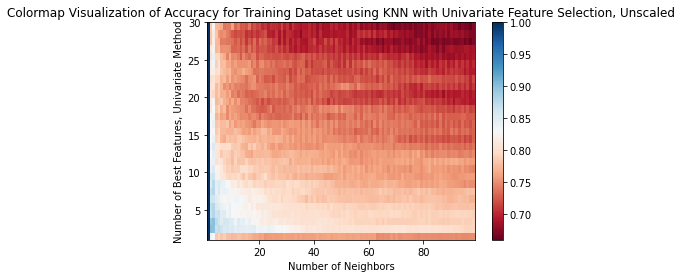

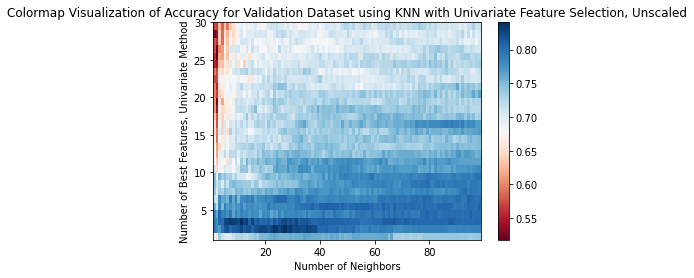

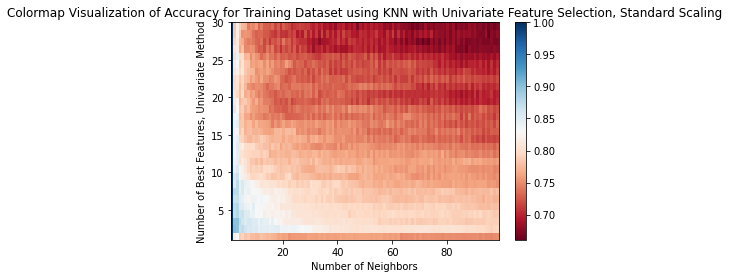

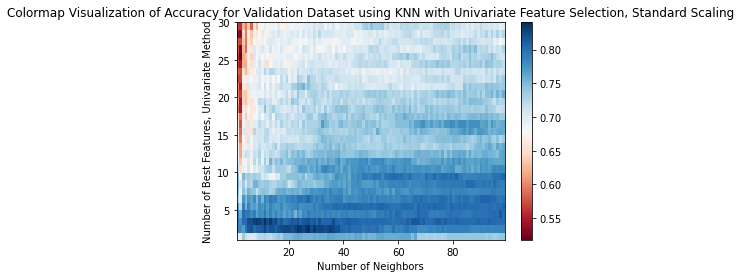

In [ ]:
fig26 = plt.figure(num=26, clear=True)
ax26 = fig26.add_subplot(1,1,1)
c5train_uni = ax26.pcolormesh(n_neighbors, n_bestfeatures, acc5_uni_train, cmap='RdBu', vmin=np.min(acc5_uni_train), vmax=np.max(acc5_uni_train))
fig26.colorbar(c5train_uni, ax=ax26)
ax26.set_title('Colormap Visualization of Accuracy for Training Dataset using KNN with Univariate Feature Selection, Unscaled')
ax26.set_xlabel('Number of Neighbors')
ax26.set_ylabel('Number of Best Features, Univariate Method')

fig27 = plt.figure(num=27, clear=True)
ax27 = fig27.add_subplot(1,1,1)
c5valid_uni = ax27.pcolormesh(n_neighbors, n_bestfeatures, acc5_uni_valid, cmap='RdBu', vmin=np.min(acc5_uni_valid), vmax=np.max(acc5_uni_valid))
fig27.colorbar(c5valid_uni, ax=ax27)
ax27.set_title('Colormap Visualization of Accuracy for Validation Dataset using KNN with Univariate Feature Selection, Unscaled')
ax27.set_xlabel('Number of Neighbors')
ax27.set_ylabel('Number of Best Features, Univariate Method')

fig28 = plt.figure(num=28, clear=True)
ax28 = fig28.add_subplot(1,1,1)
c5train_uni_std = ax28.pcolormesh(n_neighbors, n_bestfeatures, acc5_uni_std_scaling_train, cmap='RdBu', vmin=np.min(acc5_uni_std_scaling_train), vmax=np.max(acc5_uni_std_scaling_train))
fig28.colorbar(c5train_uni_std, ax=ax28)
ax28.set_title('Colormap Visualization of Accuracy for Training Dataset using KNN with Univariate Feature Selection, Standard Scaling')
ax28.set_xlabel('Number of Neighbors')
ax28.set_ylabel('Number of Best Features, Univariate Method')

fig29 = plt.figure(num=29, clear=True)
ax29 = fig29.add_subplot(1,1,1)
c5valid_uni_std = ax29.pcolormesh(n_neighbors, n_bestfeatures, acc5_uni_std_scaling_valid, cmap='RdBu', vmin=np.min(acc5_uni_std_scaling_valid), vmax=np.max(acc5_uni_std_scaling_valid))
fig29.colorbar(c5valid_uni_std, ax=ax29)
ax29.set_title('Colormap Visualization of Accuracy for Validation Dataset using KNN with Univariate Feature Selection, Standard Scaling')
ax29.set_xlabel('Number of Neighbors')
ax29.set_ylabel('Number of Best Features, Univariate Method')

print(np.max(acc5_uni_train))
print(np.max(acc5_uni_valid))
print(np.max(acc5_uni_std_scaling_train))
print(np.max(acc5_uni_std_scaling_valid))

Number of Best Features = 6, Number of Neighbors = 27, Training Acc Unscaled = 0.8042704626334519, Validation Acc Unscaled = 0.8049645390070922

In [ ]:
from sklearn import svm

In [ ]:
#Support Vector Machines -- Linear
cls = svm.SVC(kernel = 'linear')
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X5_train)
pipe = pipeline.Pipeline([('cls', cls)])
pipe.fit(X5_train, y5_train)
print(f'Technique; SVM - Linear, Training Acc Unscaled = {metrics.accuracy_score(y5_train, pipe.predict(X5_train))}, Validation Acc Unscaled = {metrics.accuracy_score(y5_valid, pipe.predict(X5_valid))}')

pipe = pipeline.Pipeline([('scal', std_scaler), ('cls', cls)])
print(f'Technique; SVM - Linear, Training Acc Standard Rescaled = {metrics.accuracy_score(y5_train, pipe.predict(X5_train))}, Validation Acc Standard Rescaled = {metrics.accuracy_score(y5_valid, pipe.predict(X5_valid))}')

Technique; SVM - Linear, Training Acc Unscaled = 0.7924080664294187, Validation Acc Unscaled = 0.7943262411347518
Technique; SVM - Linear, Training Acc Standard Rescaled = 0.7888493475682088, Validation Acc Standard Rescaled = 0.7978723404255319


In [ ]:
#Support Vector Machine -- Polynomial -- from deg 2 to 20
poly_deg = np.arange(2, 21)

acc5_poly_train = []
acc5_poly_valid = []
acc5_poly_std_scaling_train = []
acc5_poly_std_scaling_valid = []
for d in poly_deg:
  cls = svm.SVC(kernel = 'poly', degree = d)
  scaler = preprocessing.StandardScaler()
  pipe = pipeline.Pipeline([('cls', cls)])
  pipe.fit(X5_train, y5_train)
  print(f"Technique: SVM - Polynomial, Degree = {d}, Training Acc Unscaled = {metrics.accuracy_score(y5_train, pipe.predict(X5_train))}, Validation Acc Unscaled = {metrics.accuracy_score(y5_valid, pipe.predict(X5_valid))}")
  acc5_poly_train.append(metrics.accuracy_score(y5_train, pipe.predict(X5_train)))
  acc5_poly_valid.append(metrics.accuracy_score(y5_valid, pipe.predict(X5_valid)))

for d in poly_deg:
  cls = svm.SVC(kernel = 'poly', degree = d)
  scaler = preprocessing.StandardScaler()
  pipe = pipeline.Pipeline([('scal', scaler), ('cls', cls)])
  pipe.fit(X5_train, y5_train)
  acc5_poly_std_scaling_train.append(metrics.accuracy_score(y5_train, pipe.predict(X5_train)))
  acc5_poly_std_scaling_valid.append(metrics.accuracy_score(y5_valid, pipe.predict(X5_valid)))
  print(f"Technique: SVM - Polynomial, Degree = {d}, Training Acc Standard Rescaled = {metrics.accuracy_score(y5_train, pipe.predict(X5_train))}, Validation Acc Standard Rescaled = {metrics.accuracy_score(y5_valid, pipe.predict(X5_valid))}")  


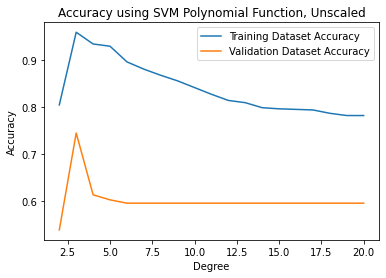

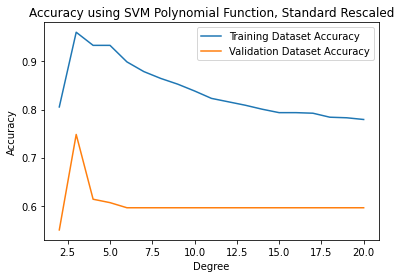

In [ ]:
fig30 = plt.figure(num=30, clear=True)
ax30 = fig30.add_subplot(1,1,1)
ax30.plot(poly_deg, acc5_poly_train, label = "Training Dataset Accuracy")
ax30.plot(poly_deg, acc5_poly_valid, label = "Validation Dataset Accuracy")
ax30.set_title("Accuracy using SVM Polynomial Function, Unscaled")
ax30.set_ylabel('Accuracy')
ax30.set_xlabel("Degree")
ax30.legend()

fig31 = plt.figure(num=31, clear=True)
ax31 = fig31.add_subplot(1,1,1)
ax31.plot(poly_deg, acc5_poly_std_scaling_train, label = "Training Dataset Accuracy")
ax31.plot(poly_deg, acc5_poly_std_scaling_valid, label = "Validation Dataset Accuracy")
ax31.set_title("Accuracy using SVM Polynomial Function, Standard Rescaled")
ax31.set_ylabel('Accuracy')
ax31.set_xlabel("Degree")
ax31.legend()

Technique: SVM - Polynomial, Degree = 3, Training Acc Unscaled = 0.9584816132858838, Validation Acc Unscaled = 0.7446808510638298

In [ ]:
#Support Vector Machine -- Radial Basis Function
cls = svm.SVC(kernel = 'rbf')
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X5_train)
pipe = pipeline.Pipeline([('cls', cls)])
pipe.fit(X5_train, y5_train)
print(f'Technique; SVM - Linear, Training Acc Unscaled = {metrics.accuracy_score(y5_train, pipe.predict(X5_train))}, Validation Acc Unscaled = {metrics.accuracy_score(y5_valid, pipe.predict(X5_valid))}')

pipe = pipeline.Pipeline([('scal', std_scaler), ('cls', cls)])
print(f'Technique; SVM - Linear, Training Acc Unscaled = {metrics.accuracy_score(y5_train, pipe.predict(X5_train))}, Validation Acc Standard Rescaled = {metrics.accuracy_score(y5_valid, pipe.predict(X5_valid))}')

Technique; SVM - Linear, Training Acc Unscaled = 0.9122182680901542, Validation Acc Unscaled = 0.7588652482269503
Technique; SVM - Linear, Training Acc Unscaled = 0.9110320284697508, Validation Acc Standard Rescaled = 0.7553191489361702


In [ ]:
#Support Vector Machine -- Sigmoid Function
cls = svm.SVC(kernel = 'sigmoid')
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X5_train)
pipe = pipeline.Pipeline([('cls', cls)])
pipe.fit(X5_train, y5_train)
print(f'Technique; SVM - Linear, Training Acc Unscaled = {metrics.accuracy_score(y5_train, pipe.predict(X5_train))}, Validation Acc Unscaled = {metrics.accuracy_score(y5_valid, pipe.predict(X5_valid))}')

pipe = pipeline.Pipeline([('scal', std_scaler), ('cls', cls)])
print(f'Technique; SVM - Linear, Training Acc Unscaled = {metrics.accuracy_score(y5_train, pipe.predict(X5_train))}, Validation Acc Standard Rescaled = {metrics.accuracy_score(y5_valid, pipe.predict(X5_valid))}')

Technique; SVM - Linear, Training Acc Unscaled = 0.7224199288256228, Validation Acc Unscaled = 0.7695035460992907
Technique; SVM - Linear, Training Acc Unscaled = 0.7164887307236062, Validation Acc Standard Rescaled = 0.7801418439716312


I chose to use K-Nearest Neighbors with number of neighbors = 27, using 6 of the best features, and without scaling since it produced the best validation dataset accuracy (0.805), and doesn't overfit too much (training dataset accuracy = 0.8043). 

In [ ]:
#Making Predictions
cls = neighbors.KNeighborsClassifier(n_neighbors=k)
scaler = preprocessing.StandardScaler()
uni = feature_selection.SelectKBest(k=i)
num5finalmodel = pipeline.Pipeline([('fs', uni), ('cls', cls)])
num5finalmodel.fit(X5_train, y5_train)
y5_blind_predicted = num5finalmodel.predict(X5_blind)
Xdf=pd.DataFrame(y5_blind_predicted)
Xdf.to_csv('Number 5 Blind Prediction.csv')

**Problem 6**

I spent approximately 10-12 hours on this homework. I have adhered to the Duke Community Standard.